# Analise de dados de Bets no Instagram


Esta é uma verificação de dados de algumas empresas de Bets no Brasil para a disciplina de Analise de Mídias Sociais no periodo 24/2 na Universidade Federal de Ouro Preto.

Objetivo da analise: Verificação das postagens de casas de apostas e sua popularidade.

**Aluno:** Leonam Victor de Oliveira Lima Almeida

**Aluno:** Patrick Caminhas Matos

**Professor:** Filipe Nunes Ribeiro

# Importação de bibliotecas e arquivos

## 1.1 Download de bibliotecas

In [ ]:
!pip install bertopic sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

## 1. Importação das bibliotecas

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
import seaborn as sns
from google.colab import files
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

## 2. Importação dos arquivos

In [ ]:
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho do arquivo dentro do Google Drive
file_path = "/content/drive/My Drive/AMS/Bets_Instagram.csv"

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset
df.head()

Mounted at /content/drive


,content_type,creation_time,hashtags,id,is_branded_content,lang,match_type,mcl_url,modified_time,multimedia,post_owner.type,post_owner.id,post_owner.name,post_owner.username,statistics.comment_count,statistics.like_count,statistics.views,statistics.views_date_last_refreshed,text
0,videos,2025-03-21T01:43:14+00:00,NaN,6.664445e+14,False,pt,NaN,https://www.facebook.com/transparency-tools/co...,2025-03-21T05:13:19+00:00,"[{""id"":""666444462762050"",""type"":""video"",""url"":...",business,755223176368263,MC Games,mcgames.bet,37.0,NaN,33149.0,2025-03-22,Mais um dele nessas eliminatórias…
1,photos,2025-03-21T00:00:42+00:00,"[""valeapenasejogar"",""games""]",4.066349e+15,False,pt,NaN,https://www.facebook.com/transparency-tools/co...,2025-03-21T00:10:55+00:00,"[{""id"":""4066349046943411"",""type"":""photo"",""url""...",business,1069094021531294,PIXBET,pixbet,4.0,93.0,16070.0,2025-03-22,"Fonte: vocês. 😎 E aí, estão com a maioria ou p..."
2,photos,2025-03-20T23:18:44+00:00,"[""gireeven\u00e7a"",""geralbet"",""autoroulette""]",1.758820e+15,False,pt,NaN,https://www.facebook.com/transparency-tools/co...,2025-03-20T23:25:58+00:00,"[{""id"":""1758820018183115"",""type"":""photo"",""url""...",creator,629674773384040,Geralbet,geralbet.bet.br,0.0,NaN,797.0,2025-03-22,Auto Roulette: um giro pode mudar tudo! 🔄\nApo...
3,videos,2025-03-20T23:17:26+00:00,NaN,6.651301e+14,False,pt,NaN,https://www.facebook.com/transparency-tools/co...,2025-03-20T23:49:07+00:00,"[{""id"":""665130093126041"",""type"":""video"",""url"":...",creator,1561340407779085,DonaldBet Oficial,donaldbetoficial,15.0,NaN,4143.0,2025-03-22,Quer ganhar até R$25 em Freebet aqui na Donald...
4,photos,2025-03-20T23:00:23+00:00,"[""betd\u00e1sorte"",""suafelicidade\u00e9aqui"",""...",1.170698e+15,False,pt,NaN,https://www.facebook.com/transparency-tools/co...,2025-03-20T23:06:04+00:00,"[{""id"":""1170697808124823"",""type"":""photo"",""url""...",business,603125052151928,BET DÁ SORTE,betdasorte,0.0,6.0,1863.0,2025-03-22,VOCÊ VAI QUERER IR MAIS LONGE E SER O MAIORAL ...


## 3. Verificação inicial dos dados

### 3.1 Verificação dos tipo de cada coluna

In [ ]:
# Exibir informações básicas do dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54082 entries, 0 to 54081
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   content_type                          54082 non-null  object 
 1   creation_time                         54082 non-null  object 
 2   hashtags                              32689 non-null  object 
 3   id                                    54080 non-null  float64
 4   is_branded_content                    54082 non-null  bool   
 5   lang                                  53525 non-null  object 
 6   match_type                            0 non-null      float64
 7   mcl_url                               54080 non-null  object 
 8   modified_time                         53546 non-null  object 
 9   multimedia                            54082 non-null  object 
 10  post_owner.type                       54082 non-null  object 
 11  post_owner.id  

**Numero de posts: 54081**

---


**Total de colunas: 19**

### 3.2 Verificação de nulos

In [ ]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())




Valores ausentes por coluna:
content_type                                0
creation_time                               0
hashtags                                21393
id                                          2
is_branded_content                          0
lang                                      557
match_type                              54082
mcl_url                                     2
modified_time                             536
multimedia                                  0
post_owner.type                             0
post_owner.id                               0
post_owner.name                             0
post_owner.username                         0
statistics.comment_count                  585
statistics.like_count                    4852
statistics.views                        11992
statistics.views_date_last_refreshed    11992
text                                      692
dtype: int64


## 3.3 Nome das Bets

In [ ]:
# Obter os valores únicos da coluna post_owner.name
valores_unicos_nome = df['post_owner.name'].unique()

# Quantidade de bets do dataset
quantidade = len(valores_unicos_nome)
print(f"O dataset tem {quantidade} bets analisadas.")

# Exibir os valores únicos
print("Valores únicos de post_owner.name:")
for valor in valores_unicos_nome:
    print(f"- {valor}")


O dataset tem 34 bets analisadas.
Valores únicos de post_owner.name:
- MC Games
- PIXBET
- Geralbet
- DonaldBet Oficial
- BET DÁ SORTE
- UX Bet
- Reals Bet
- VIVA SORTE OFICIAL
- Betão
- Hanz.bet.br
- Lotogreen
- Bullsbet
- Rei do Pitaco
- SportingbetBR
- KingPanda
- LUVA BET🧤
- Sorte Online | A vida muda, pode apostar!
- 𝗣𝗔𝗚𝗢𝗟.𝗕𝗘𝗧
- VBET Brasil
- UPBET | Apostas e Cassino
- Mr. Jack
- LuckBet
- BETAKI
- Betsson Brasil
- stakebr
- Lottoland Brasil 🇧🇷
- Casa de Apostas
- BRX BET RR Participações
- Cgg.bet.br
- ApostaMax
- Startbet
- BandBet
- vera.bet.br
- Jon Bet ®


# Analises

## 1. Classificação das paginas

1.1 Classificação das paginas por tipos

In [ ]:
# Obter os valores únicos da coluna post_owner.type
valores_unicos = df['post_owner.type'].unique()

# Exibir os valores únicos
print("Tipos de classificação das bets pelo Instagram:")
for valor in valores_unicos:
    print(f"- {valor}")


Tipos de classificação das bets pelo Instagram:
- business
- creator


In [ ]:
# Contar quantas páginas (post_owner.name) existem por tipo de conta (post_owner.type)
contagem_tipos = df.groupby('post_owner.type')['post_owner.name'].nunique()

# Exibir os resultados
print("Quantidade de páginas por tipo de conta:")
for tipo, quantidade in contagem_tipos.items():
    print(f"- {tipo}: {quantidade}")


Quantidade de páginas por tipo de conta:
- business: 29
- creator: 5


In [ ]:
# Filtrando as páginas onde o post_owner.type é 'creator'
creator_pages = df[df['post_owner.type'] == 'creator']

# Exibindo as páginas (ou qualquer outra informação relevante)
print(creator_pages[['post_owner.type', 'post_owner.name']])


      post_owner.type    post_owner.name
2             creator           Geralbet
3             creator  DonaldBet Oficial
6             creator          Reals Bet
9             creator          Reals Bet
20            creator          KingPanda
...               ...                ...
37455         creator          Reals Bet
37490         creator          Reals Bet
39111         creator          Reals Bet
39112         creator          Reals Bet
39113         creator          Reals Bet

[4792 rows x 2 columns]


## 2. Análise de Engajamento

### 2.1 Análise total de comentários, curtidas e visualizações

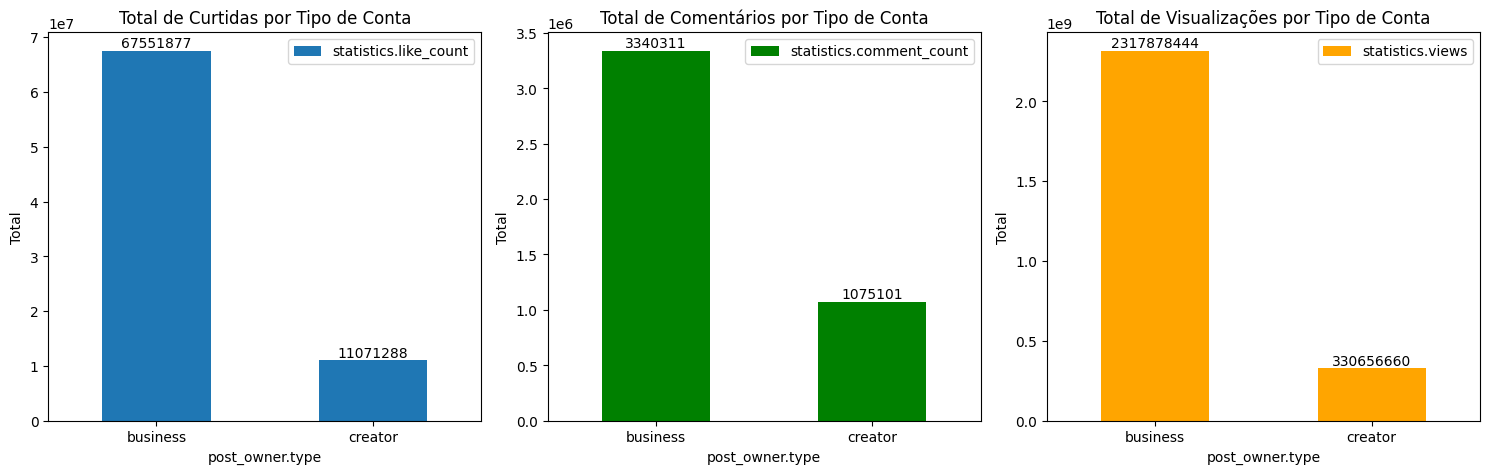

In [ ]:

# Total de curtidas, comentários e visualizações por tipo de conta
engagement = df.groupby('post_owner.type').agg({'statistics.like_count': 'sum',
                                                'statistics.comment_count': 'sum',
                                                'statistics.views': 'sum'})

# Criando uma figura com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico comparando Like total por tipo de conta
bars = engagement[['statistics.like_count']].plot(kind='bar', ax=axes[0])
axes[0].set_title("Total de Curtidas por Tipo de Conta")
axes[0].set_ylabel("Total")
axes[0].tick_params(axis='x', rotation=0)

# Adicionando os valores absolutos no gráfico de Like
for bar in bars.patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)}',
                 ha='center', va='bottom')

# Gráfico comparando Comment total por tipo de conta
bars = engagement[['statistics.comment_count']].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Total de Comentários por Tipo de Conta")
axes[1].set_ylabel("Total")
axes[1].tick_params(axis='x', rotation=0)

# Adicionando os valores absolutos no gráfico de Comment
for bar in bars.patches:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)}',
                 ha='center', va='bottom')

# Gráfico comparando Views total por tipo de conta
bars = engagement[['statistics.views']].plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title("Total de Visualizações por Tipo de Conta")
axes[2].set_ylabel("Total")
axes[2].tick_params(axis='x', rotation=0)

# Adicionando os valores absolutos no gráfico de Views
for bar in bars.patches:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)}',
                 ha='center', va='bottom')

# Ajustando o layout para evitar sobreposição de títulos e rótulos
plt.tight_layout()
plt.show()


### 2.2 Análise média de comentários, curtidas e visualizações

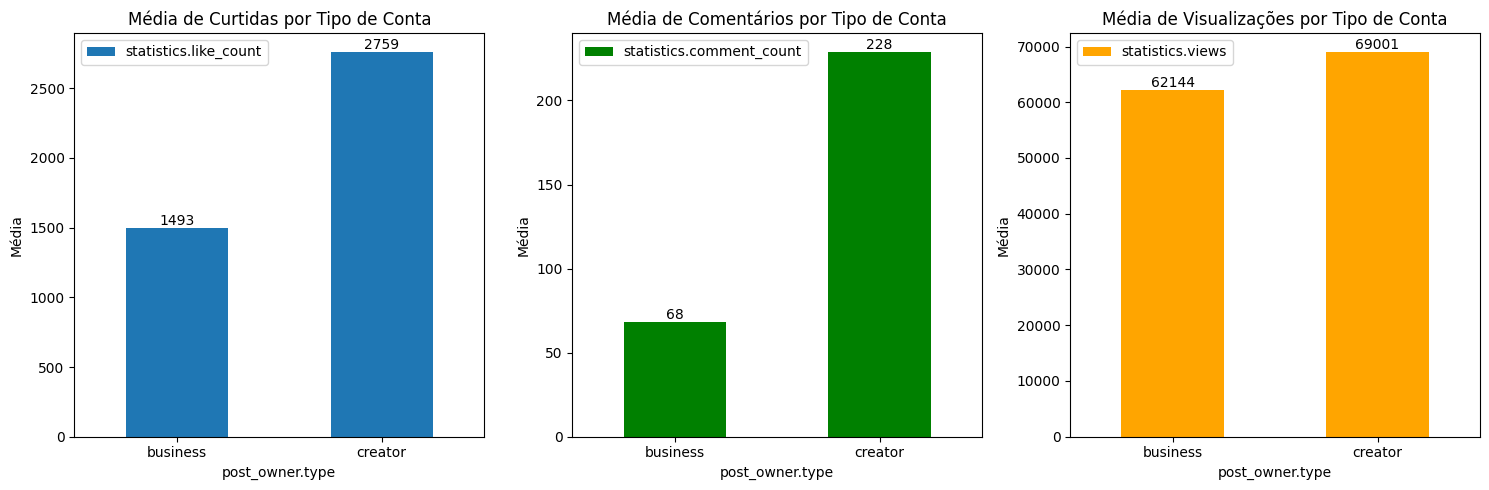

In [ ]:

# Média de curtidas, comentários e visualizações por tipo de conta
engagement = df.groupby('post_owner.type').agg({'statistics.like_count': 'mean',
                                                'statistics.comment_count': 'mean',
                                                'statistics.views': 'mean'})

# Criando uma figura com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico comparando Like por tipo de conta
bars = engagement[['statistics.like_count']].plot(kind='bar', ax=axes[0])
axes[0].set_title("Média de Curtidas por Tipo de Conta")
axes[0].set_ylabel("Média")
axes[0].tick_params(axis='x', rotation=0)

# Adicionando os valores absolutos no gráfico de Like
for bar in bars.patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)}',
                 ha='center', va='bottom')

# Gráfico comparando Comment por tipo de conta
bars = engagement[['statistics.comment_count']].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Média de Comentários por Tipo de Conta")
axes[1].set_ylabel("Média")
axes[1].tick_params(axis='x', rotation=0)

# Adicionando os valores absolutos no gráfico de Comment
for bar in bars.patches:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)}',
                 ha='center', va='bottom')

# Gráfico comparando Views por tipo de conta
bars = engagement[['statistics.views']].plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title("Média de Visualizações por Tipo de Conta")
axes[2].set_ylabel("Média")
axes[2].tick_params(axis='x', rotation=0)

# Adicionando os valores absolutos no gráfico de Views
for bar in bars.patches:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{int(height)}',
                 ha='center', va='bottom')

# Ajustando o layout para evitar sobreposição de títulos e rótulos
plt.tight_layout()
plt.show()


### 2.3 Correlação entre curtidas e comentários

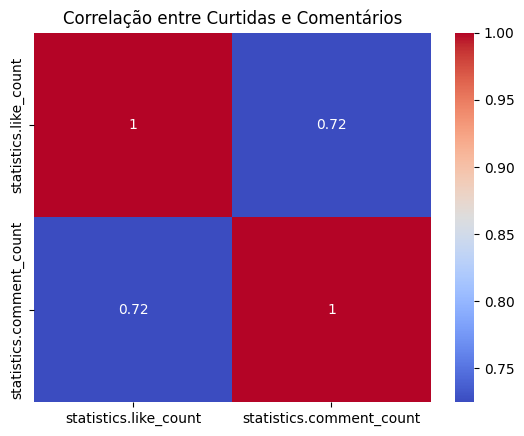

In [ ]:
# Correlação entre curtidas e comentários → Mostra se posts com mais curtidas também têm mais comentários.
correlation = df[['statistics.like_count', 'statistics.comment_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlação entre Curtidas e Comentários")
plt.show()


### 2.4 Média de engajamento por tipo de de contéudo

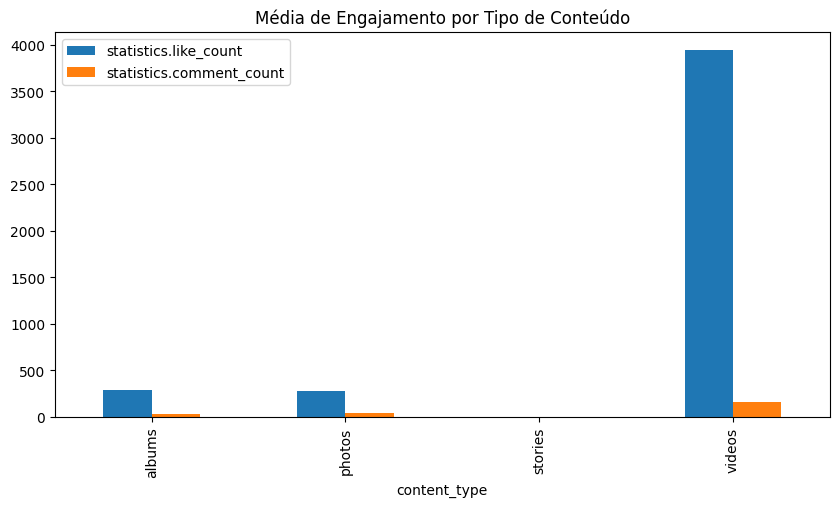

In [ ]:
# Média de Engajamento por Tipo de Conteúdo
df.groupby('content_type').agg({'statistics.like_count': 'mean',
                                'statistics.comment_count': 'mean'}).plot(kind='bar', figsize=(10,5))
plt.title("Média de Engajamento por Tipo de Conteúdo")
plt.show()


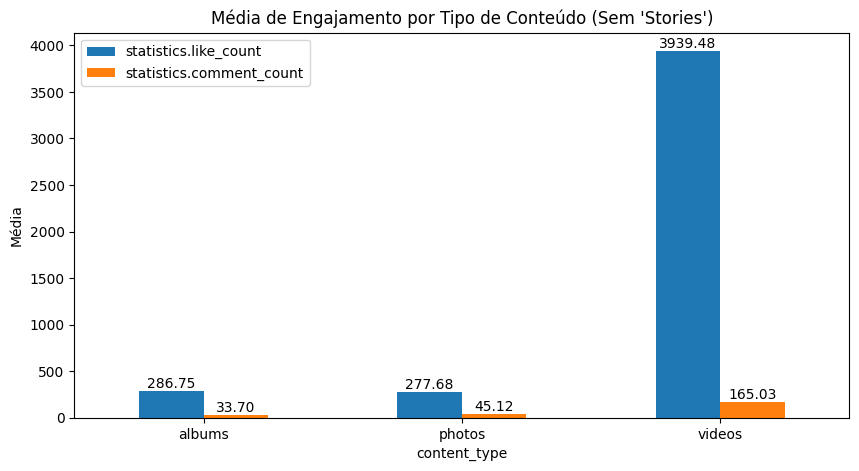

In [ ]:

# Filtrar para remover 'stories' do content_type
df_filtered = df[df['content_type'] != 'stories']

# Média de curtidas e comentários por tipo de conteúdo, após o filtro
engagement = df_filtered.groupby('content_type').agg({'statistics.like_count': 'mean',
                                                      'statistics.comment_count': 'mean'})

# Criando gráfico
ax = engagement.plot(kind='bar', figsize=(10,5))

# Ajustar título e rótulos
plt.title("Média de Engajamento por Tipo de Conteúdo (Sem 'Stories')")
plt.ylabel("Média")
plt.xticks(rotation=0)

# Adicionar valores nas barras (média de engajamento)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height:.2f}',
            ha='center', va='bottom')

plt.show()


### 2.5 Top 10 Paginas

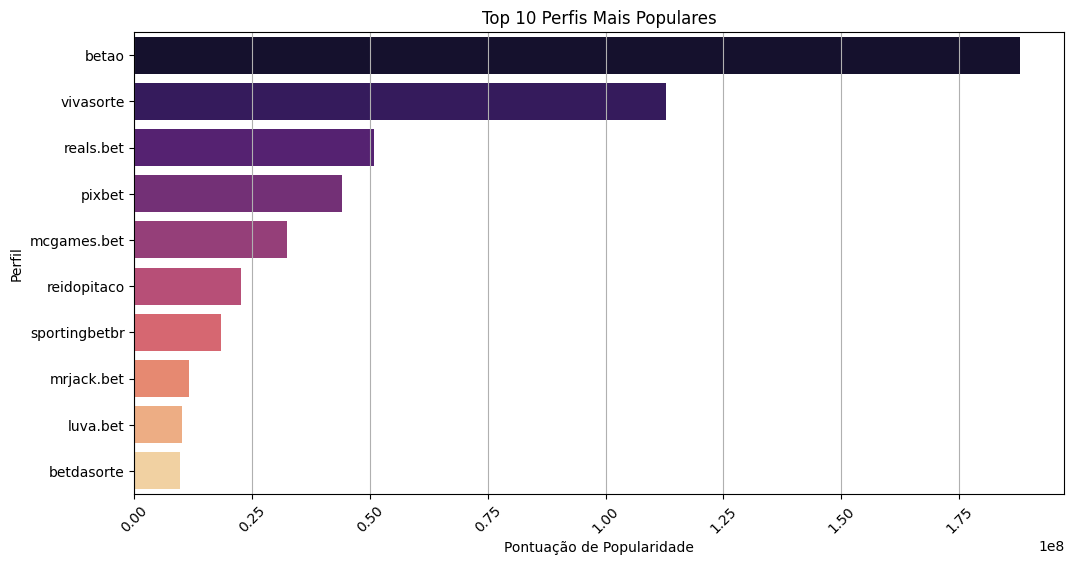

In [ ]:
# Converter colunas para numéricas, tratando possíveis valores ausentes
df['statistics.comment_count'] = pd.to_numeric(df['statistics.comment_count'], errors='coerce').fillna(0)
df['statistics.like_count'] = pd.to_numeric(df['statistics.like_count'], errors='coerce').fillna(0)
df['statistics.views'] = pd.to_numeric(df['statistics.views'], errors='coerce').fillna(0)

# Criar métrica de popularidade ponderada
df['popularidade'] = df['statistics.like_count'] * 0.3 + df['statistics.comment_count'] * 0.5 + df['statistics.views'] * 0.2

# Agrupar por nome de usuário do dono do post
perfil_popularidade = df.groupby('post_owner.username')['popularidade'].sum().reset_index()

# Selecionar os 10 perfis mais populares
top_perfis = perfil_popularidade.sort_values(by='popularidade', ascending=False).head(10)

# Criar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(y=top_perfis['post_owner.username'], x=top_perfis['popularidade'], palette="magma")

# Ajustar rótulos e título
plt.xlabel("Pontuação de Popularidade")
plt.ylabel("Perfil")
plt.title("Top 10 Perfis Mais Populares")
plt.xticks(rotation=45)
plt.grid(axis="x")

plt.show()

## 2. Nuvem de palavras

### 3.1 Nuvem de palavras de Hashtags

In [ ]:
df_hashtags = df[['hashtags']].copy()  # Criar uma cópia apenas com a coluna de hashtags

# Remover valores nulos dessa cópia (mas sem alterar df original)
df_hashtags.dropna(inplace=True)

In [ ]:
# Função para normalizar o formato Unicode
def normalize_unicode(text):
    return text.encode().decode('unicode_escape')  # Corrige caracteres como \u00e1 para á

# Transformar os valores da coluna hashtags
df_hashtags['hashtags'] = df_hashtags['hashtags'].apply(normalize_unicode)

# Converter strings que representam listas em listas reais (caso estejam em formato de string)
def parse_hashtags(text):
    try:
        hashtags_list = ast.literal_eval(text)  # Tenta converter a string para lista real
        if isinstance(hashtags_list, list):
            return hashtags_list
    except (ValueError, SyntaxError):
        pass
    return [text]  # Se não for uma lista válida, mantém como string dentro de uma lista

df_hashtags['hashtags'] = df_hashtags['hashtags'].apply(parse_hashtags)

# Flatten (transformar listas em uma única lista com todas as hashtags)
all_hashtags = [hashtag for hashtags in df_hashtags['hashtags'] for hashtag in hashtags]

# Remover caracteres especiais e deixar tudo em minúsculas
all_hashtags = [re.sub(r'[^a-zA-Z0-9_#]', '', ht).lower() for ht in all_hashtags]


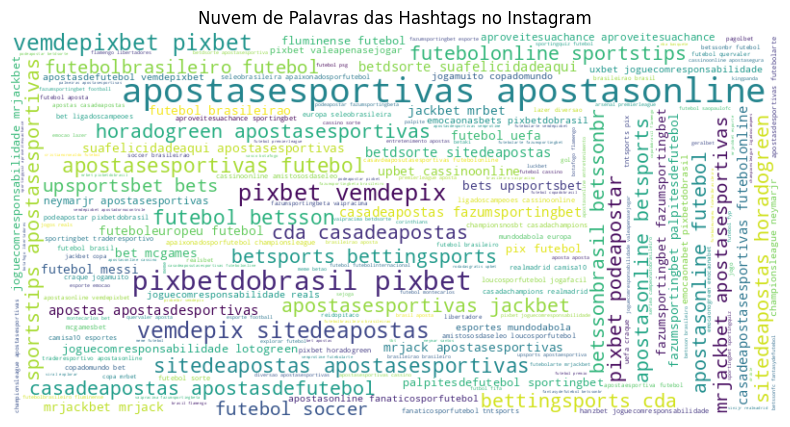

In [ ]:
# Criar um texto único contendo todas as hashtags
hashtags_text = " ".join(all_hashtags)

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(hashtags_text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Remove eixos
plt.title("Nuvem de Palavras das Hashtags no Instagram")
plt.show()


### 3.2 Nuvem de palavras do texto

In [ ]:
# Criar uma cópia do DataFrame para não impactar outras análises
df_textos = df[['text']].copy()

# Remover linhas com valores nulos na coluna 'text'
df_textos.dropna(inplace=True)

In [ ]:
# Lista de artigos definidos e indefinidos em português
artigos = ['a', 'an', 'o', 'a', 'as', 'os', 'um', 'uma', 'uns', 'umas']

# Função para normalizar o formato Unicode
def normalize_unicode(text):
    return text.encode().decode('unicode_escape')  # Corrige caracteres como \u00e1 para á

# Função para remover palavras com uma letra, artigos e palavras com acentuação
def clean_text(text):
    # Normalizar texto
    text = normalize_unicode(text)
    # Remover caracteres especiais e deixar tudo em minúsculas
    text = re.sub(r'[^a-zA-Z0-9á-ú\s]', '', text.lower())
    # Remover palavras com uma letra, artigos e sequências de caracteres indesejados como 'ãã', 'âã', etc.
    text = " ".join([word for word in text.split() if len(word) > 1 and word not in artigos and not re.match(r'^[áéíóúãâõ]{1}$', word) and not re.match(r'(\w)\1{1,}', word)])
    return text

# Aplicar a limpeza ao texto
df_textos['text'] = df_textos['text'].apply(clean_text)


<ipython-input-16-0f119e2232a2>:6: DeprecationWarning: invalid escape sequence '\$'
  return text.encode().decode('unicode_escape')  # Corrige caracteres como \u00e1 para á
<ipython-input-16-0f119e2232a2>:6: DeprecationWarning: invalid escape sequence '\#'
  return text.encode().decode('unicode_escape')  # Corrige caracteres como \u00e1 para á
<ipython-input-16-0f119e2232a2>:6: DeprecationWarning: invalid escape sequence '\_'
  return text.encode().decode('unicode_escape')  # Corrige caracteres como \u00e1 para á


In [ ]:
# Remover caracteres especiais e deixar tudo em minúsculas
df_textos['text'] = df_textos['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9á-ú\s]', '', x.lower()))


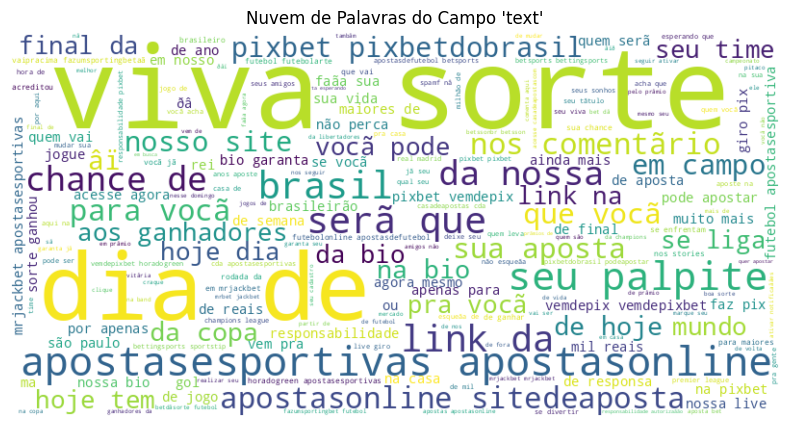

In [ ]:
# Criar uma string com todos os textos combinados
textos_combined = " ".join(df_textos['text'].tolist())

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(textos_combined)

# Exibir a nuvem de palavras
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Remove eixos
plt.title("Nuvem de Palavras do Campo 'text'")
plt.show()


## 4. Análise Temporal

### 4.1 Análise do horario e dias das das postagens

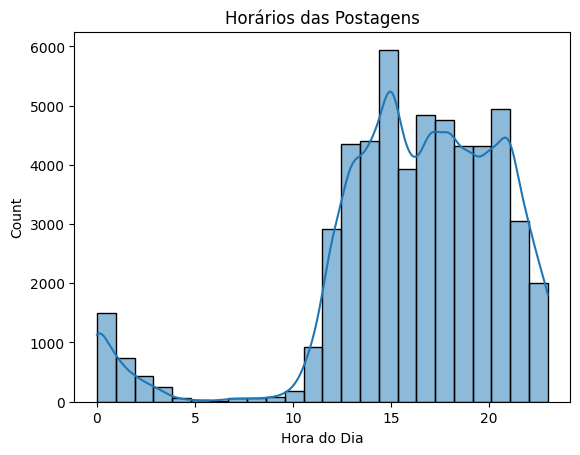

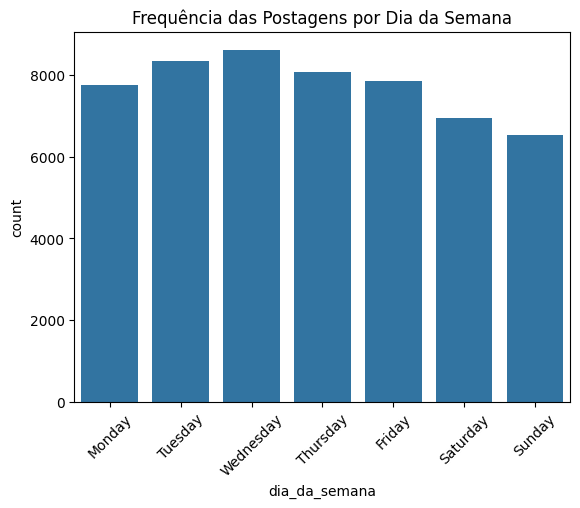

In [ ]:
# Melhores horários e dias para postagens
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['hora'] = df['creation_time'].dt.hour
df['dia_da_semana'] = df['creation_time'].dt.day_name()

sns.histplot(df['hora'], bins=24, kde=True)
plt.title("Horários das Postagens")
plt.xlabel("Hora do Dia")
plt.show()

sns.countplot(x=df['dia_da_semana'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Frequência das Postagens por Dia da Semana")
plt.xticks(rotation=45)
plt.show()


### 4.2 Análise do engajamento ao longo dos meses

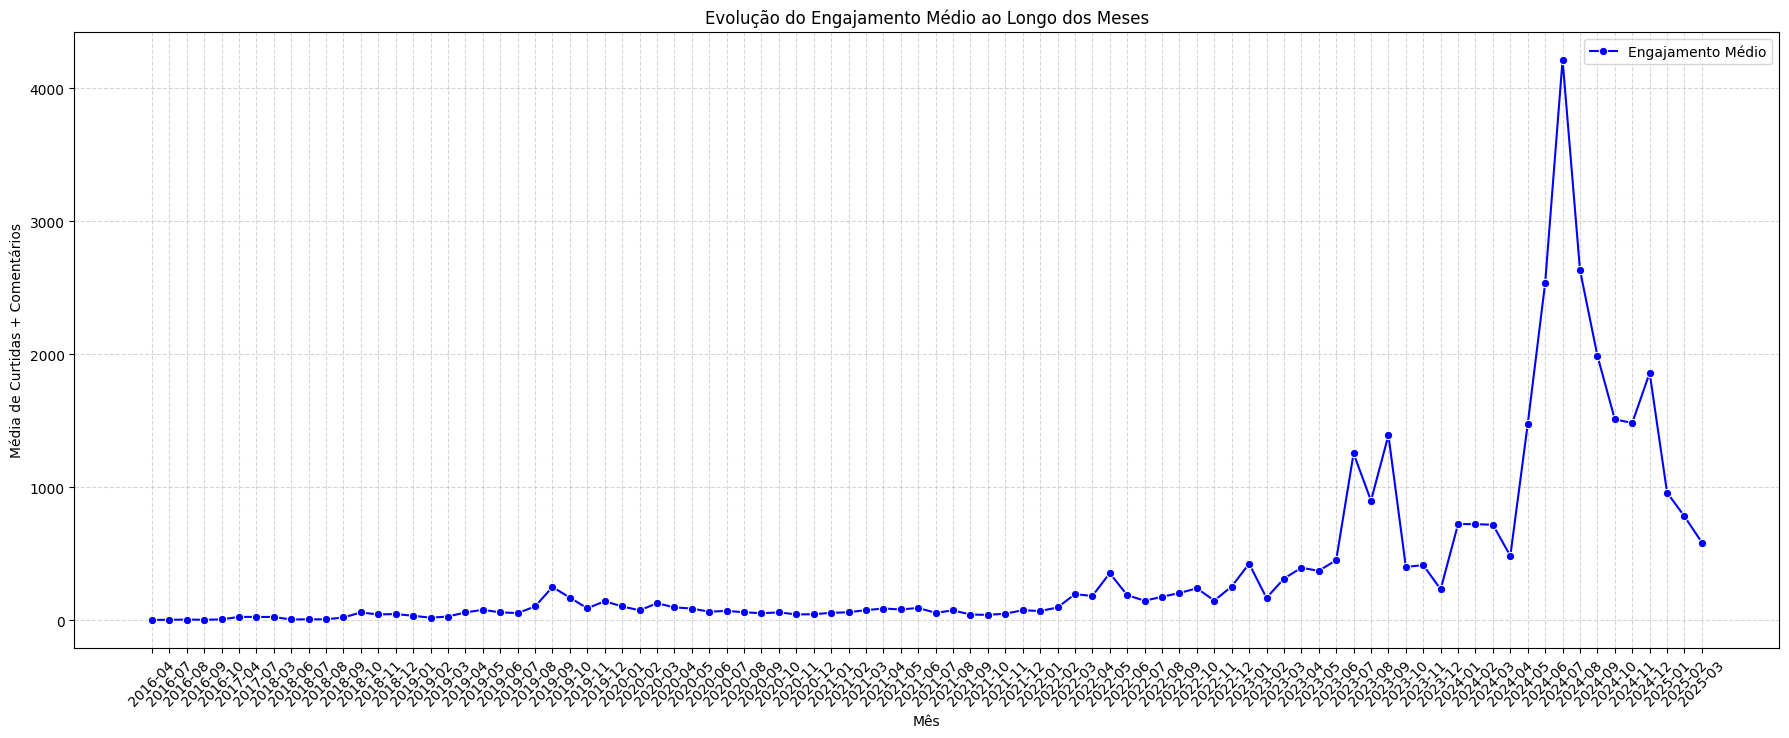

In [ ]:
# Converter a coluna de tempo para datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])

# Criar uma nova coluna de engajamento médio
df['engajamento_lc'] = ((df['statistics.like_count'] * 0.3 ) + (df['statistics.comment_count'] * 0.5))

# Agrupar por mês e calcular a média de engajamento
df_engajamento = df.groupby(df['creation_time'].dt.to_period("M"))['engajamento_lc'].mean().reset_index()
df_engajamento['creation_time'] = df_engajamento['creation_time'].astype(str)  # Converter para string

# Criar gráfico de linhas
plt.figure(figsize=(22, 8))
sns.lineplot(data=df_engajamento, x='creation_time', y='engajamento_lc', marker="o", color="b", label="Engajamento Médio")

plt.xlabel("Mês")
plt.ylabel("Média de Curtidas + Comentários")
plt.title("Evolução do Engajamento Médio ao Longo dos Meses")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

### 4.2 Análise das visualizações nos meses

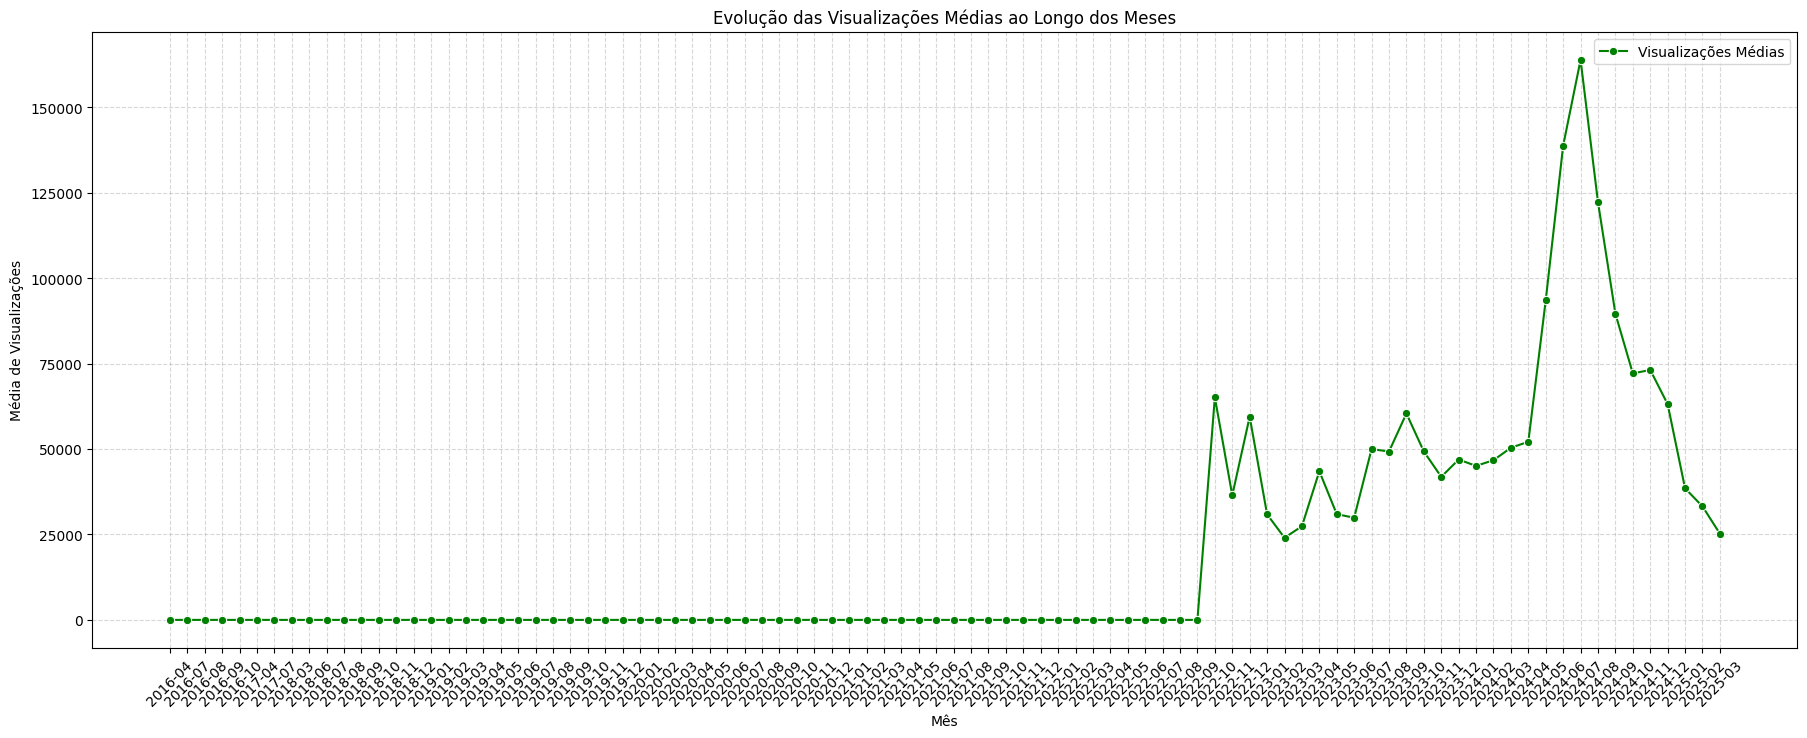

In [ ]:
# Agrupar por mês e calcular a média de visualizações
df_views = df.groupby(df['creation_time'].dt.to_period("M"))['statistics.views'].mean().reset_index()
df_views['creation_time'] = df_views['creation_time'].astype(str)  # Converter para string

# Criar gráfico de linhas
plt.figure(figsize=(22, 8))
sns.lineplot(data=df_views, x='creation_time', y='statistics.views', marker="o", color="g", label="Visualizações Médias")

plt.xlabel("Mês")
plt.ylabel("Média de Visualizações")
plt.title("Evolução das Visualizações Médias ao Longo dos Meses")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
# OBS -> Muito dos posts antigos(até 2022-08) tinham views vazias
plt.show()

## 5. Analise de hashtags



### 5.1 Hashtags mais utilizadas

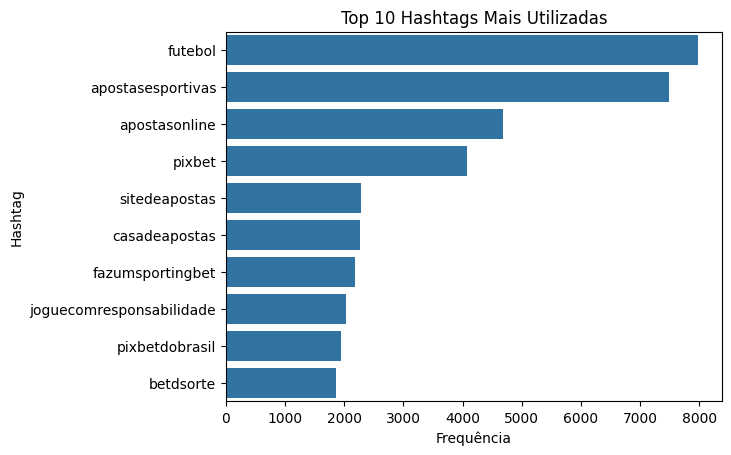

In [ ]:
from collections import Counter

hashtags_counts = Counter(all_hashtags)
top_hashtags = hashtags_counts.most_common(10)

df_hashtags = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Frequência'])
sns.barplot(data=df_hashtags, x='Frequência', y='Hashtag')
plt.title("Top 10 Hashtags Mais Utilizadas")
plt.show()


### 5.2 Evolução das hashtags

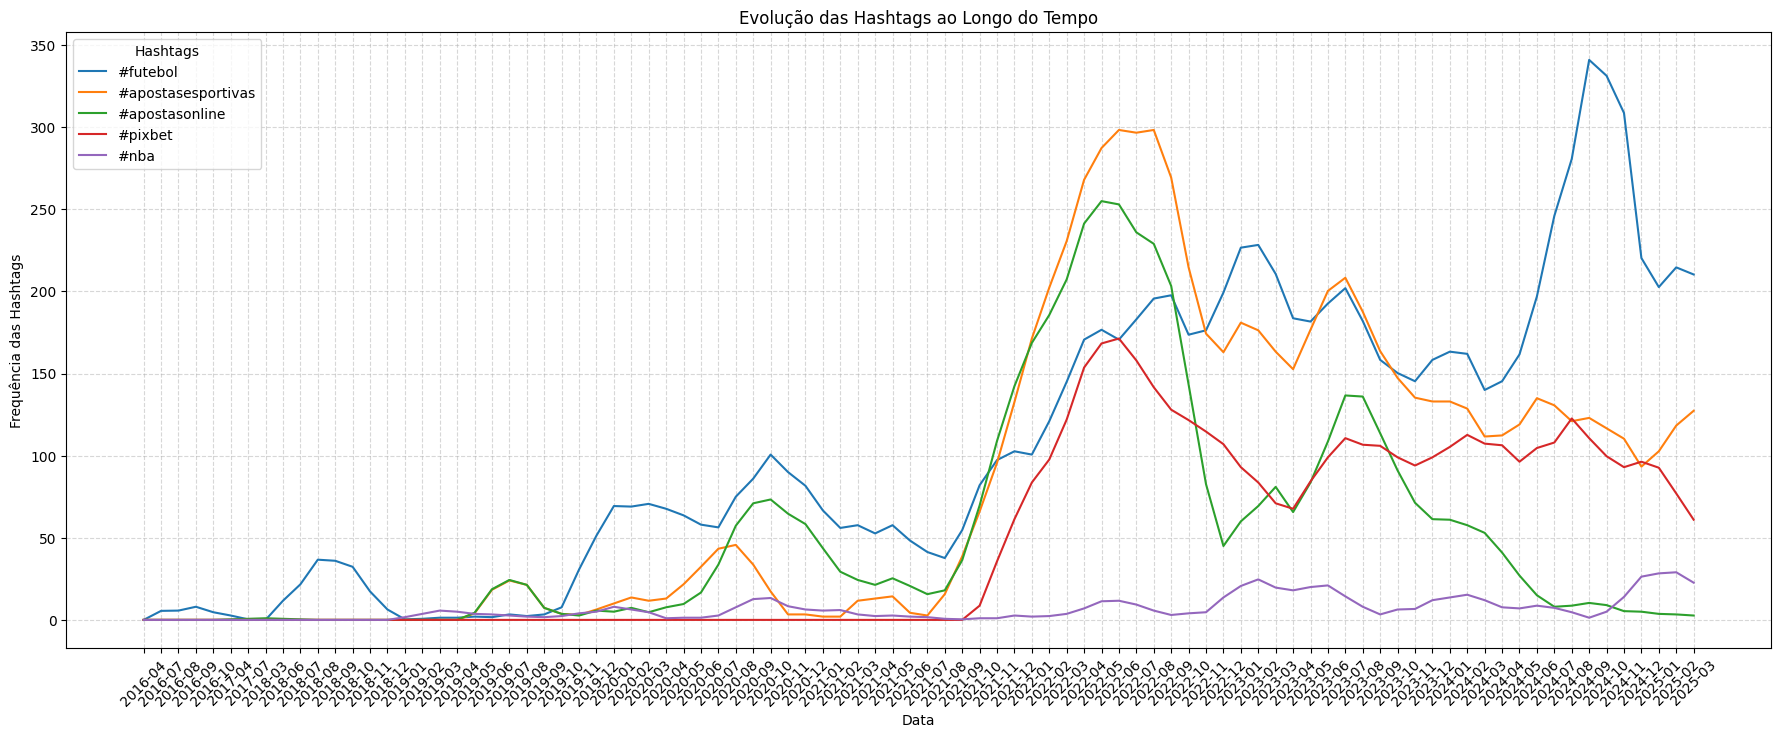

In [ ]:
# Converter a coluna de tempo para datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])

# Definir as hashtags a serem analisadas
hashtags = ['futebol', 'apostasesportivas', 'apostasonline', 'pixbet', 'nba']

# Criar colunas binárias para cada hashtag
for hashtag in hashtags:
    df[hashtag] = df['hashtags'].fillna('').apply(lambda x: hashtag in x.lower())

# Agrupar por data e somar a frequência das hashtags
df_time = df.groupby(df['creation_time'].dt.to_period("M"))[hashtags].sum().reset_index()
df_time['creation_time'] = df_time['creation_time'].astype(str)  # Converter de Period para string

# Aplicar média móvel para suavizar oscilações
window_size = 3  # Tamanho da janela da média móvel
df_time[hashtags] = df_time[hashtags].rolling(window=window_size, min_periods=1).mean()

# Criar gráfico de linhas
plt.figure(figsize=(22, 8))
sns.lineplot(data=df_time, x='creation_time', y='futebol', label="#futebol")
sns.lineplot(data=df_time, x='creation_time', y='apostasesportivas', label="#apostasesportivas")
sns.lineplot(data=df_time, x='creation_time', y='apostasonline', label="#apostasonline")
sns.lineplot(data=df_time, x='creation_time', y='pixbet', label="#pixbet")
sns.lineplot(data=df_time, x='creation_time', y='nba', label="#nba")


plt.xlabel("Data")
plt.ylabel("Frequência das Hashtags")
plt.title("Evolução das Hashtags ao Longo do Tempo")
plt.xticks(rotation=45)
plt.legend(title="Hashtags")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## 6. Número de Postagens ao Longo dos Anos


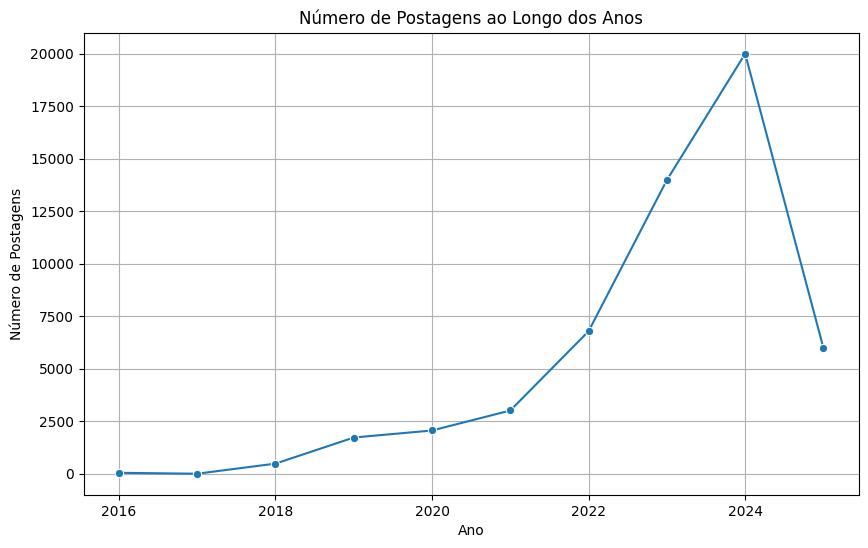

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que a coluna 'creation_time' esteja no formato datetime
df['creation_time'] = pd.to_datetime(df['creation_time'], errors='coerce')  # Garantir que seja um formato datetime

# Extrair o ano da coluna 'creation_time'
df['ano'] = df['creation_time'].dt.year

# Contar o número de postagens por ano
postagens_por_ano = df.groupby('ano').size()

# Plotar o número de postagens por ano
plt.figure(figsize=(10,6))
sns.lineplot(x=postagens_por_ano.index, y=postagens_por_ano.values, marker='o')
plt.title("Número de Postagens ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Número de Postagens")
plt.grid(True)
plt.show()


##  7. Extração de tópicos

In [ ]:
# Remover linhas onde a coluna "text" está vazia
dfT = df
dfT = dfT.dropna(subset=['text'])

# Transformar em uma lista de textos
documents = dfT['text'].tolist()

In [ ]:
# Usar um modelo de embeddings treinado para português
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# Criar o modelo BERTopic
topic_model = BERTopic(language="portuguese", embedding_model=embedding_model)

# Ajustar o modelo aos textos
topics, probs = topic_model.fit_transform(documents)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Exibir os 10 principais tópicos
topic_model.get_topic_info().head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,23271,-1_futebol_que_na_você,"[futebol, que, na, você, do, com, em, quem, de...",[Quem vai se dar bem no jogo de ida da Copa do...
1,0,917,0_nba_basquete_lakers_celtics,"[nba, basquete, lakers, celtics, warriors, hea...",[NBA ON FIRE!\nAs partidas mais eletrizantes d...
2,1,861,1_flamengo_mengão_carioca_rubro,"[flamengo, mengão, carioca, rubro, negro, cori...",[🔥Flamengo x Vasco pela Semifinal do Campeonat...
3,2,592,2_pixbet_vemdepix_vemdepixbet_horadogreen,"[pixbet, vemdepix, vemdepixbet, horadogreen, s...",[HOJE TEM FLA! 🔴⚫️\n\nE se o @flamengo entra e...
4,3,534,3_manchester_city_premier_united,"[manchester, city, premier, united, arsenal, l...",[Cinco jogos e muitas possibilidades na #Prem...
5,4,456,4_madrid_real_barcelona_espanhol,"[madrid, real, barcelona, espanhol, laliga, ba...",[Domingo é dia de clássico no Rei do Pitaco! 👑...
6,5,387,5_italiano_milan_juventus_roma,"[italiano, milan, juventus, roma, inter, campe...",[Hoje tem clássico na Itália. 🔥🇮🇹\n\nMilan x N...
7,6,325,6_gol_ele_golaço_goleiro,"[gol, ele, golaço, goleiro, viral, gols, fyp, ...","[Que gol foi esse, hein?! 🔥⚽\n\n#gol #futebol ..."
8,7,259,7_corinthians_timão_paulista_derby,"[corinthians, timão, paulista, derby, paulistã...",[DIA DE TIMÃO! 🦅\n\nE se o Corinthians entra e...
9,8,255,8_nfl_bowl_chiefs_eagles,"[nfl, bowl, chiefs, eagles, americano, superbo...","[Noite de confrontos na NFL, noite de garantir..."


In [ ]:
topic_model.get_topic(1)


[('flamengo', np.float64(0.024764814796406284)),
 ('mengão', np.float64(0.007010482934375658)),
 ('carioca', np.float64(0.006105064013083471)),
 ('rubro', np.float64(0.005704153105567168)),
 ('negro', np.float64(0.005134083969384604)),
 ('corinthians', np.float64(0.004547717001076043)),
 ('maracanã', np.float64(0.00452633219523051)),
 ('fla', np.float64(0.003885684261464533)),
 ('vasco', np.float64(0.003859749104818555)),
 ('clássico', np.float64(0.003781199484577478))]

### 7.1 Tópicos


In [ ]:
topic_model.visualize_barchart(top_n_topics=9)

### 7.2 Engajamento total por tópico

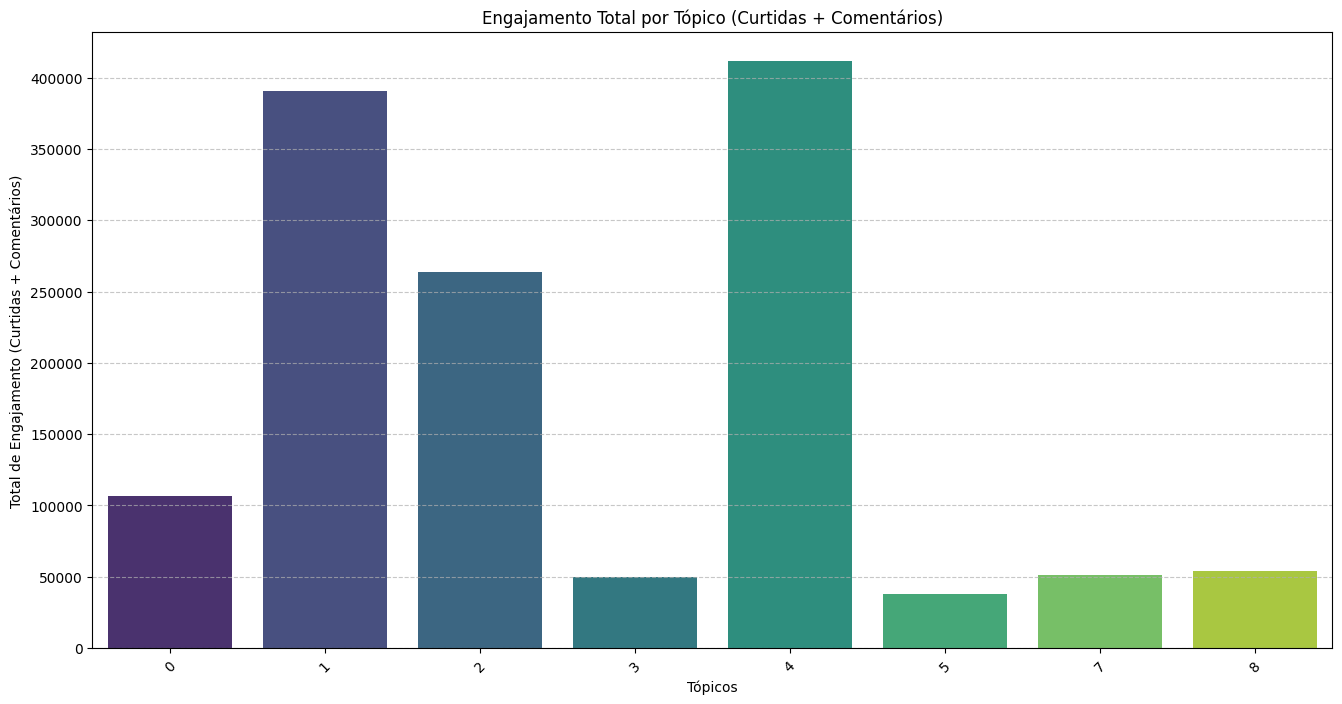

In [ ]:
# Adicionar os tópicos ao DataFrame
dfT['topic'] = topics

# Obter informações sobre todos os tópicos
topic_info = topic_model.get_topic_info()

# Filtrar os 10 tópicos mais frequentes
top_10_topics = topic_info.head(10)['Topic']

# Adicionar os tópicos ao DataFrame original, mas apenas os 10 principais
dfT['topic'] = dfT['topic'].apply(lambda x: x if x in top_10_topics.values else -1)  # '-1' para tópicos que não estão entre os 10 principais

# Calcular o engajamento com comentários e curtidas
dfT['engajamento_comentarios_curtidas'] = dfT['statistics.like_count'] + dfT['statistics.comment_count']

# Agrupar por tópico e somar o engajamento (comentários e curtidas)
df_engajamento_comentarios_curtidas = dfT.groupby('topic')['engajamento_comentarios_curtidas'].sum().reset_index()

# Ordenar por engajamento total (comentários + curtidas)
df_engajamento_comentarios_curtidas = df_engajamento_comentarios_curtidas.sort_values(by="engajamento_comentarios_curtidas", ascending=False)

# Remover o tópico -1 (tópicos fora dos 10 principais)
df_engajamento_comentarios_curtidas = df_engajamento_comentarios_curtidas[(df_engajamento_comentarios_curtidas['topic'] != -1) & (df_engajamento_comentarios_curtidas['topic'] != 6)]

# Criar gráfico de barras para engajamento com comentários e curtidas
plt.figure(figsize=(16, 8))
sns.barplot(data=df_engajamento_comentarios_curtidas, x='topic', y='engajamento_comentarios_curtidas', palette="viridis")

plt.xlabel("Tópicos")
plt.ylabel("Total de Engajamento (Curtidas + Comentários)")
plt.title("Engajamento Total por Tópico (Curtidas + Comentários)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()



### 7.3 Visualizações totais por tópico

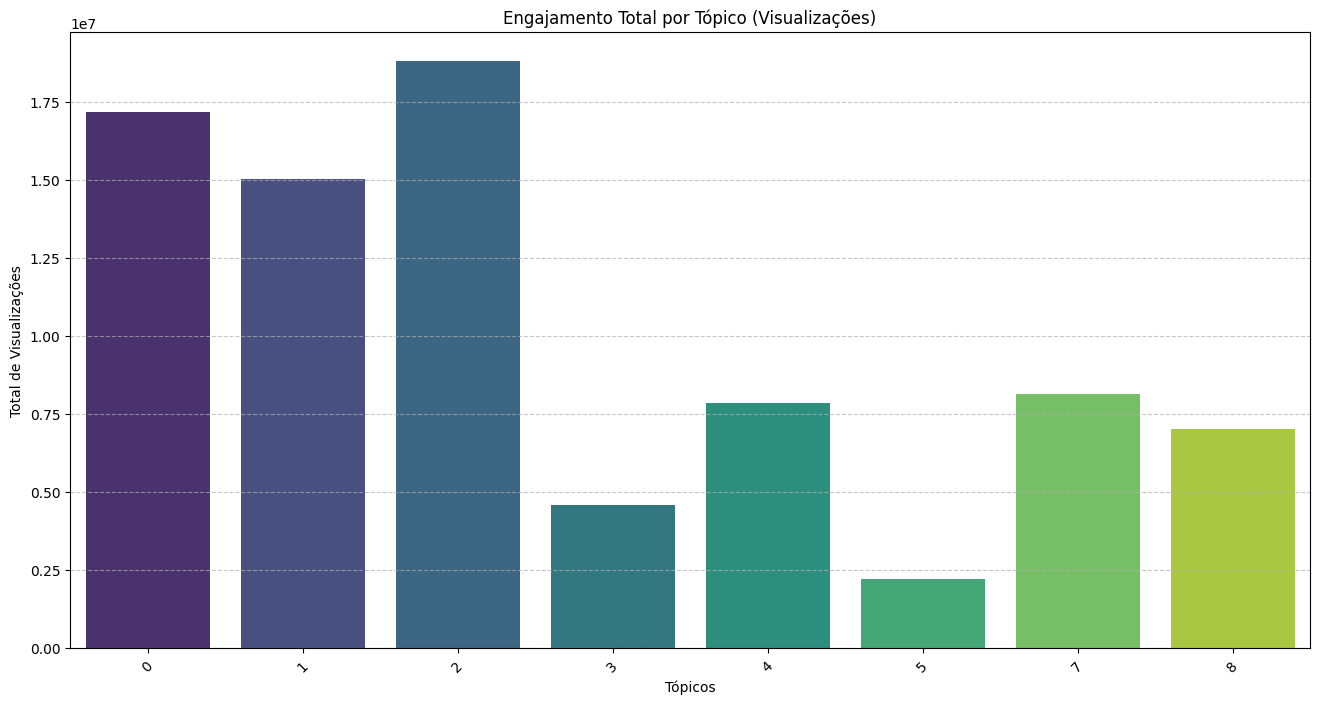

In [ ]:
# Calcular o engajamento com visualizações
dfT['engajamento_visualizacoes'] = dfT['statistics.views']

# Agrupar por tópico e somar o engajamento (visualizações)
df_engajamento_visualizacoes = dfT.groupby('topic')['engajamento_visualizacoes'].sum().reset_index()

# Remover o tópico -1 (tópicos fora dos 10 principais)
df_engajamento_visualizacoes = df_engajamento_visualizacoes[(df_engajamento_visualizacoes['topic'] != -1) & (df_engajamento_visualizacoes['topic'] != 6)]

# Ordenar por engajamento total (visualizações)
df_engajamento_visualizacoes = df_engajamento_visualizacoes.sort_values(by="engajamento_visualizacoes", ascending=False)

# Criar gráfico de barras para engajamento com visualizações
plt.figure(figsize=(16, 8))
sns.barplot(data=df_engajamento_visualizacoes, x='topic', y='engajamento_visualizacoes', palette="viridis")

plt.xlabel("Tópicos")
plt.ylabel("Total de Visualizações")
plt.title("Engajamento Total por Tópico (Visualizações)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


## Conclusão

Os dados analisados evidenciam o crescimento expressivo da presença das casas de apostas no Instagram, com um aumento contínuo na quantidade de publicações e no engajamento do público ao longo dos anos. A correlação entre eventos esportivos de grande porte, como a Copa do Mundo e a Liga dos Campeões da UEFA, e os picos de interações reforça a importância desses torneios para a estratégia das plataformas de apostas.

A análise de engajamento demonstrou que postagens em vídeo são significativamente mais eficazes em atrair curtidas e comentários, indicando uma preferência do público por esse formato. Além disso, o uso de hashtags e termos persuasivos nas publicações revela uma abordagem estratégica para captar a atenção de apostadores, reforçando o apelo emocional e a sensação de oportunidade nas apostas.

O comportamento das postagens também segue padrões previsíveis, concentrando-se no período da tarde e nos dias da semana que coincidem com eventos esportivos de grande audiência. Essa constatação sugere que as casas de apostas ajustam suas estratégias para maximizar a visibilidade e o engajamento do público.

Por fim, a análise de tópicos revelou um forte vínculo entre as casas de apostas e o futebol, especialmente com clubes de grande torcida, como o Flamengo, além da relevância de competições internacionais como La Liga, NBA e NFL para a audiência brasileira. Essas descobertas reforçam o papel das redes sociais como um meio essencial para a promoção das apostas esportivas, consolidando uma relação entre o consumo de conteúdo esportivo e o incentivo às apostas online.